<a href="https://colab.research.google.com/github/choeuneheol/honrongmachine/blob/main/kaggle_titanic_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
#데이터 불러오기
import pandas as pd
import numpy as np
import random as rnd

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
train_df=pd.read_csv("/content/train.csv")
test_df=pd.read_csv("/content/test.csv")
#모델 적용의 일관성을 위해,
#train과 test를 합한 combine 데이터 셋도 지정
combine=[train_df,test_df]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
# 훈련 자료 정보
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [21]:
#훈련 자료 정보
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [22]:
# 훈련 자료 int,float 변수 통계치
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# 훈련 자료 샘플 수 : 891(count=891)
# 훈련 자료 샘플 내 생존률 : 38.4% (mean의 Survived = 0.383838)

In [24]:
#훈련 자료 object 변수 통계치
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [ ]:
# 훈련 자료 남성수 : 577명(top의 sex = male, freq의 sex=577)
# 훈련 자료 가장 많은 승선지 : S, 644명 (top의 Embarked = S, freq의 Emabarked = 644)

##훈련 자료에서 객실 등급(Pclass)에 따른 생존률 비교

In [26]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [30]:
train_df[["SibSp","Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived',ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


##훈련 자료에서 성별(sex)에 따른 생존율 비교

In [31]:
train_df[["Sex","Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


##훈련 자료에서 함께 승선한 부모와 자식 수(parch)에 따른 생존율 비교

In [32]:
train_df[["Parch","Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [ ]:
# 동행이 적은 경우, 생존률이 높음

## 훈련 자료에서 생존여부(Survigved)에 따른 연령(Age)분포

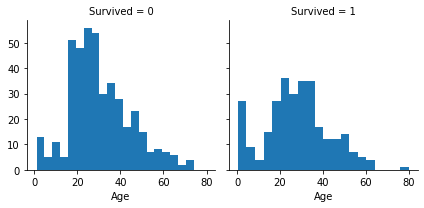

In [34]:
#열(col)을 생존 여부로 나눔
g= sns.FacetGrid(train_df,col='Survived')
#히스토그램으로 시각화, 연령의 분포를 확인, 히스토그램 bin을 20개로 설정
g.map(plt.hist,'Age',bins=20)

In [ ]:
# 4세 이하의 유아의 생존율이 높음
# 15~25세 승객등릐 생존율이 높음

## 훈련 자료에서 객실 등급(Pclass)과 생존 여부(Survived)에 따른 연령(Age) 분포

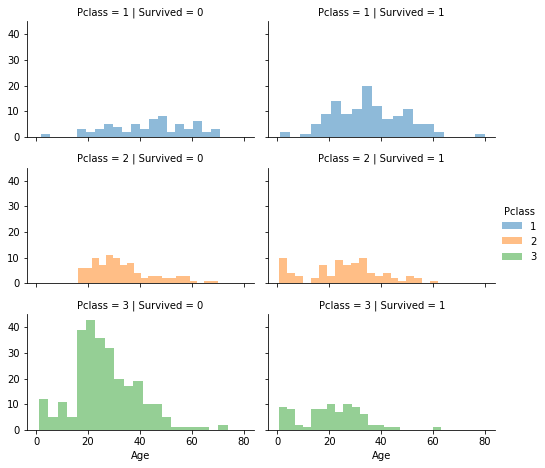

In [35]:
#을 생존 여부, 행(row)과 색깔(hue)을 객실 등급으로 나눔, width = height*aspect
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass',hue="Pclass",height=2.2, aspect=1.6)
grid.map(plt.hist,'Age',alpha=.5,bins=20) # 투명도(alpha):0.5

#범례추가
grid.add_legend();

In [ ]:
# 객실 등급이 3등급인 경우, 승객 수는 가장 많고, 생존율도 가장 낮음
# 객실 등급이 2등급인 유아는 대부분 생존함
# 객실 등급이 1등급인 경우 생존율이 비교적 높음

## 훈련자료에서 승선지(Embarked)와 객실 등급(Pclass)에 따른 생존율(Survived)

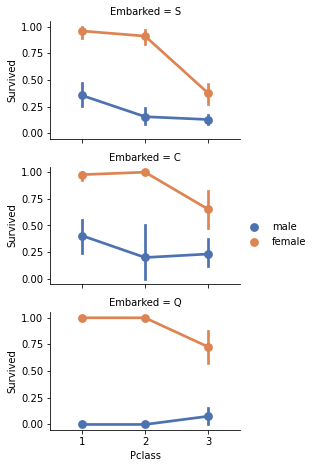

In [37]:
grid = sns.FacetGrid(train_df, row='Embarked', height=2.2, aspect=1.6)

#Pointplot으로 시각화, X:객실등급, Y:생존여부, 색깔:성별, X축 순서 : [1,2,3], 색깔 순서:[남성, 여성]
grid.map(sns.pointplot,'Pclass','Survived','Sex',palette='deep',order = [1,2,3], hue_order=["male","female"])

grid.add_legend()

In [ ]:
# 승선지가 C와 Q인 경우, 남성의 티켓 등급이 3등급일 때 2등급보다
# 생존율이 높을 가능성이 있음

## 훈련 자료에서 승선지(Embarked), 생존 여부(Survived), 성별(Sex)에 따른 요금(Fare)

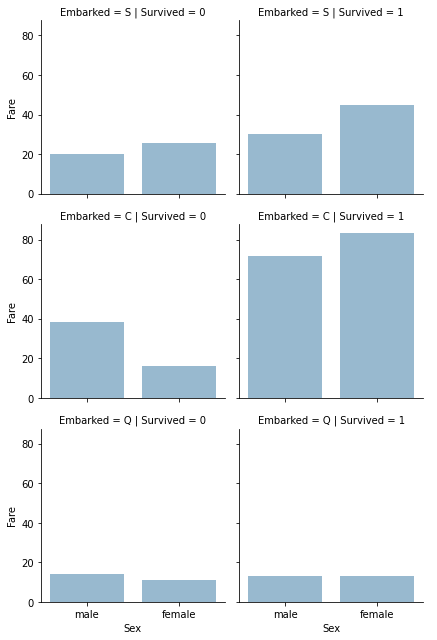

In [38]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived')

#바그래프로 시각화, X:성별, Y:요금 ,Error bar:표시안함
grid.map(sns.barplot, 'Sex','Fare', alpha=.5, ci=None,order=["male","female"])
grid.add_legend()

In [ ]:
#승선지가 S또는 C인 경우, 생존한 승객들의 평균 요금이 비교적 높음

##데이터 전처리

##안쓸 변수(Ticket, Cabin)제거

In [39]:
print("Before",train_df.shape,test_df.shape)

#열(axis=1)제거
train_df = train_df.drop(['Ticket','Cabin'],axis=1)
test_df = test_df.drop(['Ticket','Cabin'],axis=1)
combine = [train_df,test_df]
print("After",train_df.shape, test_df.shape)

Before (891, 12) (418, 11)
After (891, 10) (418, 9)


In [41]:
for dataset in combine:
  dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.',expand=False)

  pd.crosstab(train_df['Title'], train_df['Sex'])


     PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch      Fare Embarked   Title  
0      male  34.5      0      0    7.8292        Q

In [42]:
# female에서는 Miss와 Mrs가, male에서는 Master와 Mr가 두드러지게 나타남
#(Mlle와 Ms는 Miss의 , Ms는 Mrs의 불어식 표현)
#나머지는 Rare로 분류

In [43]:
for dataset in combine:
  dataset['Title'] = dataset['Title'].replace(['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir'\
                                               ,'Jonkheer','Dona'],'Rare')
  
  dataset['Title'] = dataset['Title'].replace('Mlle','Miss')
  dataset['Title'] = dataset['Title'].replace('Ms','Miss')
  dataset['Title'] = dataset['Title'].replace('Mme','Mrs')

train_df[['Title','Survived']].groupby(['Title'],as_index=False).mean()


,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


## Title 변수를 숫자형 변수로 바꿔줌

In [44]:
title_mapping={"Mr":1, "Miss":2, "Mrs":3, "Master":4,"Rare":5 }
for dataset in combine:
  dataset['Title'] = dataset['Title'].map(title_mapping)
  dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


##안쓸 변수(Name, Passengerld) 제거

In [46]:
# train_df = train_df.drop(['Name','Passengerld'], axis=1)
# test_df = test_df.drop(['Name'], axis=1)
# combine = [train_df, test_df]
# train_df.shape, test_df.shape

KeyError: ignored